In [156]:
import clana.optimize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import networkx as nx
import math
import os

In [89]:
cm = np.array([
 [100,   0,   0,   0,   0,  25,   4,   0,   0,   0],
 [  0, 100,   0,  10,   3,   0,   0,   0,   5,  20],
 [  0,   0, 200,   0,   0,   0,   0,  20,   0,   0],
 [  0,   0,   0, 180,  10,   0,   0,   0,   0,   0],
 [  0,   0,   0,  10, 220,   0,   0,   0,  10,   0],
 [  0,   0,   0,   0,   0, 250,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   1, 300,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0, 180,   0,   0],
 [  0,   0,   0,  20,   0,   0,   0,   0, 150,   5],
 [  0,   0,   0,  10,  30,   0,   0,   0,   0, 100]])

classes = np.arange(10)



In [160]:
cm = np.genfromtxt('cm.csv', delimiter=',')
print(cm.shape)
# classes = np.arange(cm.shape[0])
dir = "data/stanford-car-dataset-by-classes-folder/names.csv"
classes = np.genfromtxt(dir, delimiter=',', dtype=str)
classes

(196, 196)


array(['AM General Hummer SUV 2000', 'Acura RL Sedan 2012',
       'Acura TL Sedan 2012', 'Acura TL Type-S 2008',
       'Acura TSX Sedan 2012', 'Acura Integra Type R 2001',
       'Acura ZDX Hatchback 2012',
       'Aston Martin V8 Vantage Convertible 2012',
       'Aston Martin V8 Vantage Coupe 2012',
       'Aston Martin Virage Convertible 2012',
       'Aston Martin Virage Coupe 2012', 'Audi RS 4 Convertible 2008',
       'Audi A5 Coupe 2012', 'Audi TTS Coupe 2012', 'Audi R8 Coupe 2012',
       'Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994',
       'Audi TT Hatchback 2011', 'Audi S6 Sedan 2011',
       'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012',
       'Audi S4 Sedan 2012', 'Audi S4 Sedan 2007',
       'Audi TT RS Coupe 2012', 'BMW ActiveHybrid 5 Sedan 2012',
       'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012',
       'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012',
       'BMW 6 Series Convertible 2007', 'BMW X5 SUV 2007',
       'BMW X

In [183]:
def show_cm(cm, classes, diag_zero = False, ax=None, show=True, rotation=None):
    cm_copy = cm.copy()
    if diag_zero:
        np.fill_diagonal(cm_copy, 0)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_copy, display_labels=classes)

    disp.plot(ax=ax)
    
    if rotation:
        plt.xticks(rotation=rotation)
    if show:
        plt.show()

def show_cm_with_without_diag(cm, clases):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
    show_cm(cm, classes, ax=axes[0], show=False)
    show_cm(cm, classes, diag_zero=True, ax=axes[1])

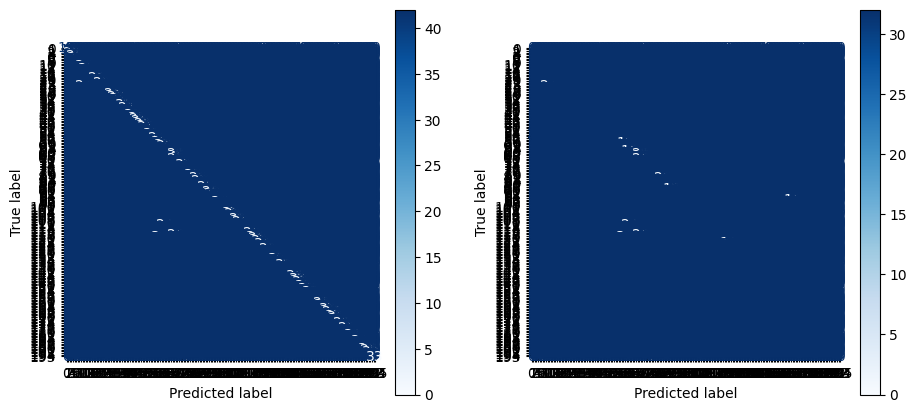

In [126]:
show_cm_with_without_diag(cm, classes)

In [91]:
result = clana.optimize.simulated_annealing(cm)
result

OptimizationResult(cm=array([[100,  20,   3,  10,   5,   0,   0,   0,   0,   0],
       [  0, 100,  30,  10,   0,   0,   0,   0,   0,   0],
       [  0,   0, 220,  10,  10,   0,   0,   0,   0,   0],
       [  0,   0,  10, 180,   0,   0,   0,   0,   0,   0],
       [  0,   5,   0,  20, 150,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 300,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   4, 100,  25,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 250,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 200,  20],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180]]), perm=array([1, 9, 4, 3, 8, 6, 0, 5, 2, 7]))

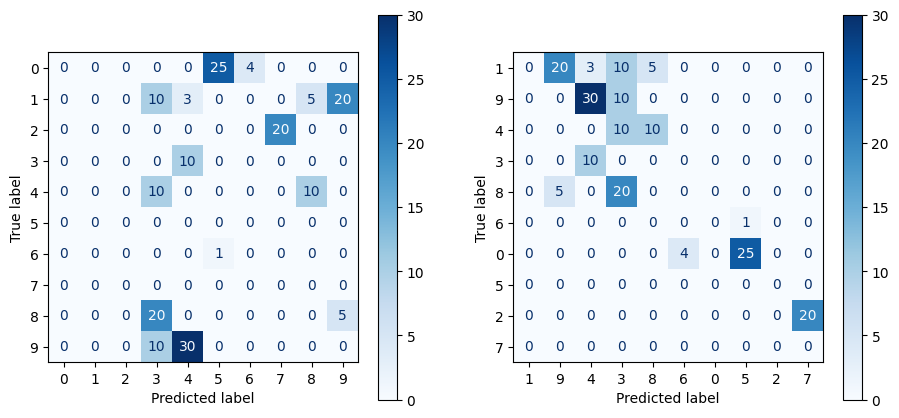

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
show_cm(cm, classes, ax=axes[0], diag_zero=True, show=False)
show_cm(result.cm, classes[result.perm], diag_zero=True, ax=axes[1])

In [161]:
cm_copy = cm.copy()
cm_copy[cm_copy < 5] = 0
G = nx.from_numpy_array(cm_copy)
composantes_connexes = list(nx.connected_components(G))
composantes_connexes = [[e for e in s] for s in composantes_connexes]
composantes_connexes

[[0, 144, 145, 146, 147, 148, 123, 124],
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  46,
  47,
  50,
  52,
  54,
  55,
  56,
  57,
  58,
  62,
  63,
  64,
  65,
  71,
  74,
  75,
  79,
  84,
  85,
  86,
  87,
  99,
  100,
  101,
  102,
  103,
  104,
  106,
  111,
  112,
  114,
  115,
  117,
  122,
  125,
  126,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  143,
  149,
  151,
  152,
  156,
  157,
  159,
  162,
  163,
  164,
  166,
  167,
  168,
  169,
  171,
  172,
  174,
  175,
  176,
  177,
  180,
  182,
  183,
  184,
  186,
  187,
  189,
  193,
  194,
  195],
 [160, 192, 11, 12, 24, 155, 190],
 [44, 45],
 [48],
 [49],
 [142,
  51,
  53,
  188,
  66,
  67,
  68,
  69,
  70,
  72,
  73,
  76,
  80,
  88,
  89,
  94,
  95,
  105,
  107,
  108,
  109,
  110,
  11

In [162]:
sub_cms = [
    cm[sub,:][:,sub]
    for sub in composantes_connexes
]
sub_classes = [
    classes[sub]
    for sub in composantes_connexes
]
print(sub_classes)
sub_cms

[array(['AM General Hummer SUV 2000', 'Jeep Patriot SUV 2012',
       'Jeep Wrangler SUV 2012', 'Jeep Liberty SUV 2012',
       'Jeep Grand Cherokee SUV 2012', 'Jeep Compass SUV 2012',
       'HUMMER H3T Crew Cab 2010', 'HUMMER H2 SUT Crew Cab 2009'],
      dtype='<U54'), array(['Acura RL Sedan 2012', 'Acura TL Sedan 2012',
       'Acura TL Type-S 2008', 'Acura TSX Sedan 2012',
       'Acura Integra Type R 2001', 'Acura ZDX Hatchback 2012',
       'Aston Martin V8 Vantage Convertible 2012',
       'Aston Martin V8 Vantage Coupe 2012',
       'Aston Martin Virage Convertible 2012',
       'Aston Martin Virage Coupe 2012', 'Audi TTS Coupe 2012',
       'Audi R8 Coupe 2012', 'Audi V8 Sedan 1994', 'Audi 100 Sedan 1994',
       'Audi 100 Wagon 1994', 'Audi TT Hatchback 2011',
       'Audi S6 Sedan 2011', 'Audi S5 Convertible 2012',
       'Audi S5 Coupe 2012', 'Audi S4 Sedan 2012', 'Audi S4 Sedan 2007',
       'BMW ActiveHybrid 5 Sedan 2012', 'BMW 1 Series Convertible 2012',
       'BMW 1 S

[array([[12.,  0.,  0.,  2.,  1., 12.,  5.,  8.],
        [ 0., 36.,  0.,  1.,  2.,  0.,  0.,  0.],
        [ 0., 13., 17.,  5.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0., 32.,  4.,  2.,  0.,  2.],
        [ 0.,  1.,  0., 11., 22.,  3.,  0.,  2.],
        [ 0.,  0.,  0.,  6.,  1., 33.,  1.,  1.],
        [ 1.,  0.,  0.,  1.,  0.,  7., 11., 19.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  1., 34.]]),
 array([[13.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  2.,  7., ...,  0.,  0.,  0.],
        [ 0.,  0., 23., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  7.,  0.,  1.],
        [ 0.,  0.,  0., ...,  1.,  7.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 33.]]),
 array([[17.,  1., 14.,  1.,  1.,  0.,  0.],
        [ 0., 33.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  4., 26.,  6.,  2.,  0.,  0.],
        [ 0.,  4., 14.,  6.,  1.,  1.,  0.],
        [ 0.,  7., 24.,  0.,  2.,  0.,  0.],
        [ 1.,  1.,  9.,  0.,  0., 19.,  0.],
        [ 0.,  9.,  2.,  0.,  0.,  0., 26.]

nb classes : 9


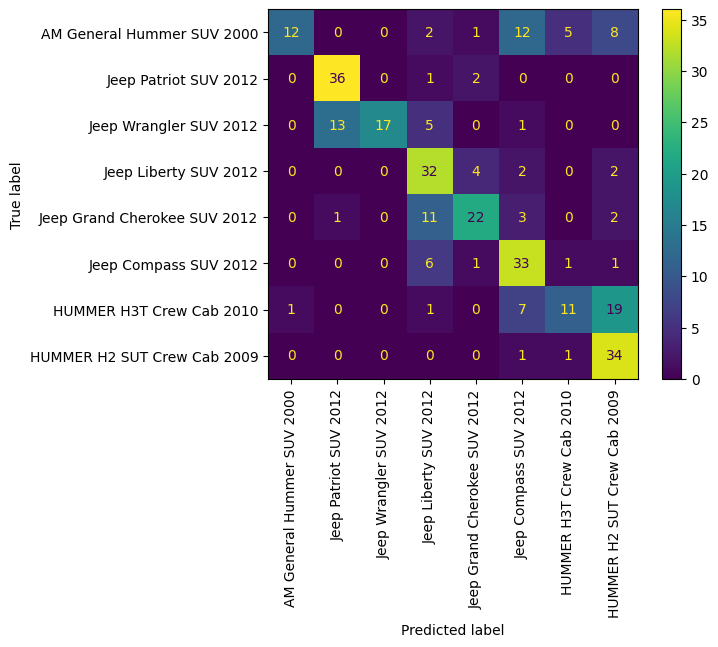

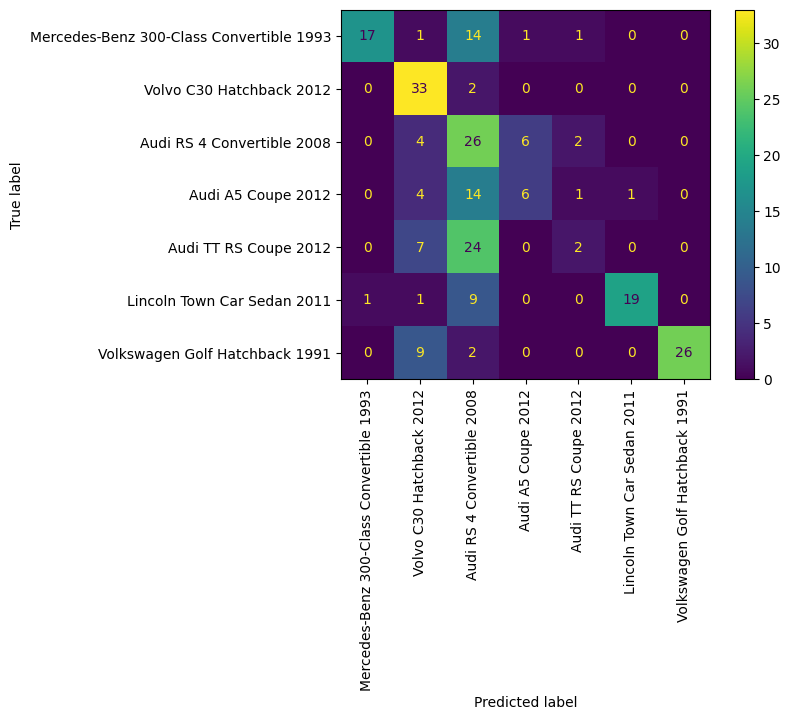

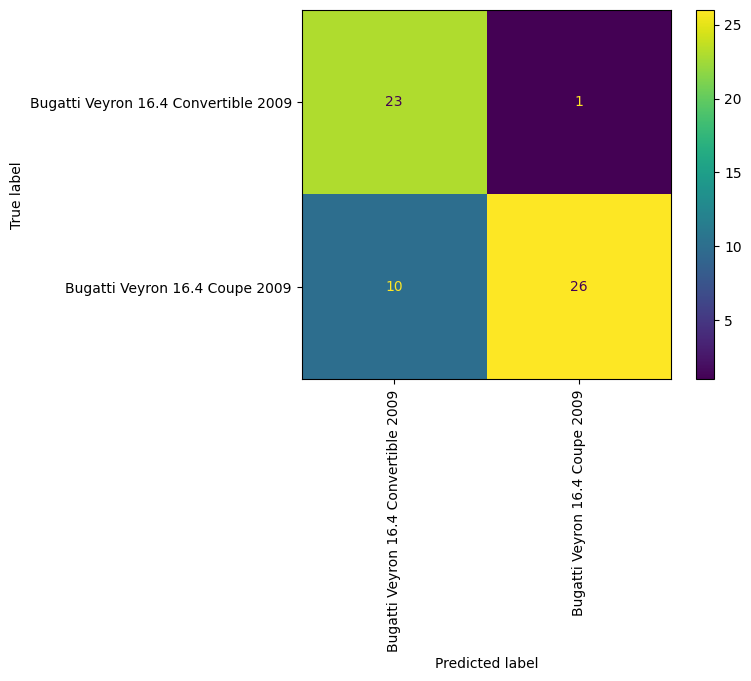

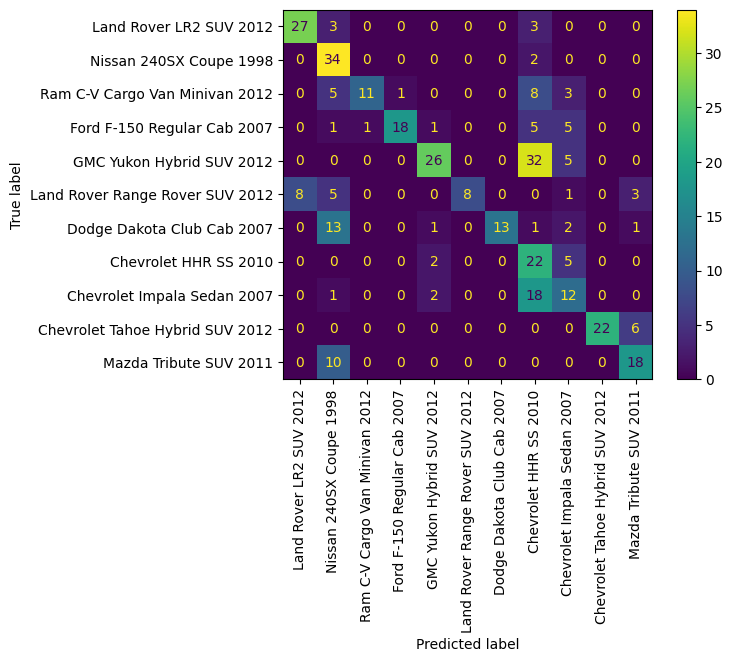

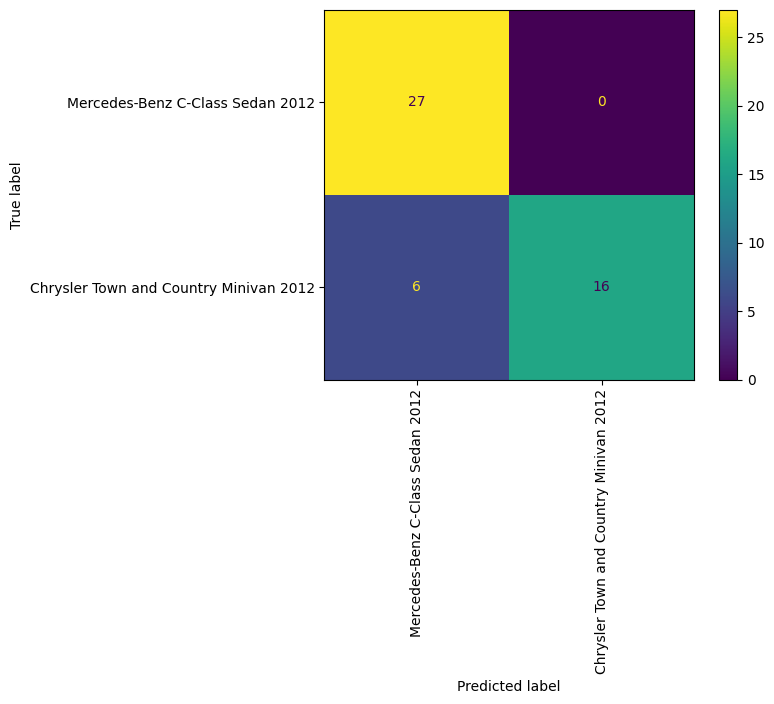

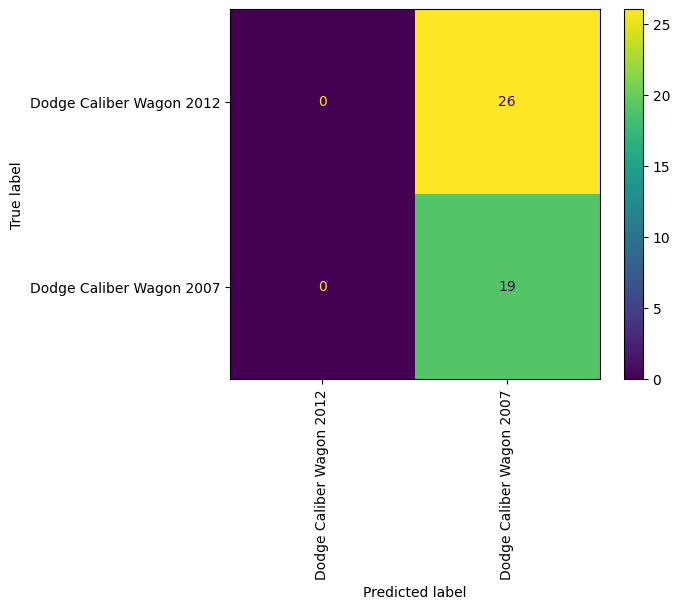

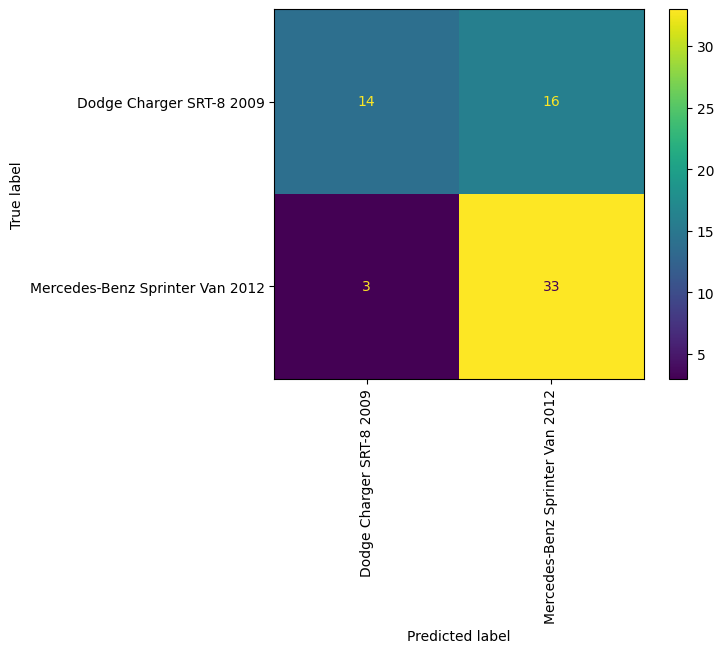

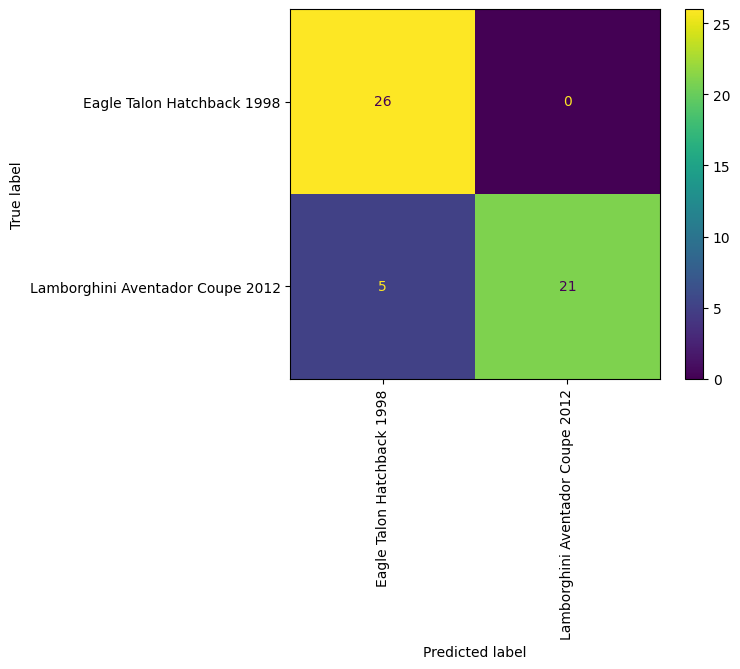

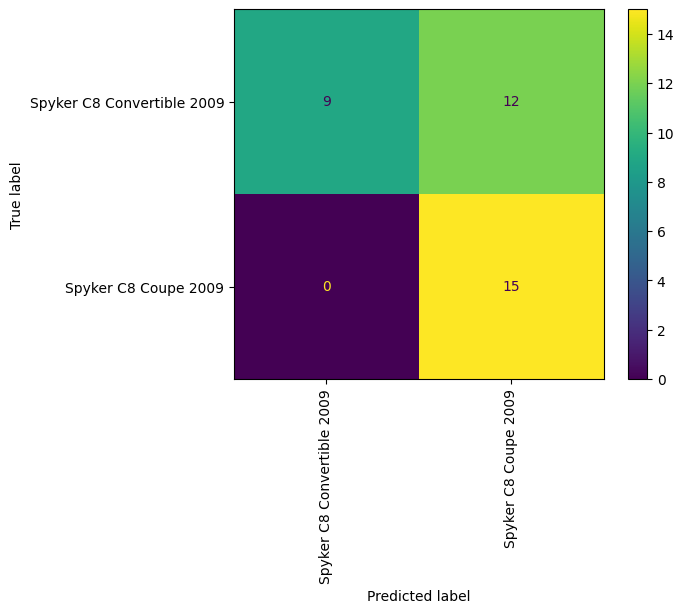

In [185]:
# drop the too big cms
sub_cms, sub_classes = list(zip(*[
    (sub_cm, sub_classes)
    for sub_cm, sub_classes in zip(sub_cms, sub_classes)
    if 1 < sub_cm.shape[0] < 15
]))

print("nb classes :", len(sub_classes))

n_per_line = 1
nrows = math.ceil(len(sub_classes) / n_per_line)
    
if False:
    fig, axes = plt.subplots(nrows=nrows, ncols=n_per_line, figsize=(11, 5 * nrows))
    if len(axes.shape) == 1:
        axes = axes.reshape((nrows, n_per_line))

for sub_cm, sub_class, i in zip(sub_cms, sub_classes, range(len(sub_cms))):
    show_cm(sub_cm, sub_class, diag_zero=False, rotation=90)